In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [ ]:
prabowo = pd.read_csv('prabowo.csv', delimiter=";")
prabowo.head()

FileNotFoundError: ignored

In [ ]:
prabowo = prabowo[['full_text']]
prabowo.head()

,full_text
0,@geloraco Soliditas kita adalah kunci untuk me...
1,@chidory_ UAS dan anies mengingatkan jangan ta...
2,@iam_ciaracafia @broirawan @Resty_J_Cayah @pra...
3,Pilpres selain ajang menentukan masa depan ban...
4,"Lagipula, mana mungkin kami menerima"" dipimpin..."


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Create a stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Create a StopWordRemover with custom and default stopwords
stop_factory = StopWordRemoverFactory()
more_stopwords = ['https', 'prabowo', 'gibran', 'pak']
default_stopwords = stop_factory.get_stop_words()
combined_stopwords = set(default_stopwords + more_stopwords)
stopword_remover = stop_factory.create_stop_word_remover()

# Assuming you already have the 'gibran' DataFrame
gibran['cleaned_text'] = gibran['full_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in stopword_remover.remove(x).split() if word.lower() not in combined_stopwords]))
gibran['cleaned_text']

0      geloraco soliditas adalah kunci wujud prabowo-...
1      chidory uas anies ingat jangan tasyahud 2 jari...
2      iam ciaracafia broirawan resty j cayah prabowo...
3      pilpres ajang tentu masa depan bangsa gw hibur...
4      lagipula mana mungkin terima pimpin langgar ha...
                             ...                        
497    sandisenderan dahnilanzar si anies udah buang ...
498    teddgus aniesbaswedan ganjarpranowo prabowo ha...
499    yusufagro prabowo gibran tweet agusyudhoyono a...
500    tag akhhh ganjarpranowo prabowo aniesbaswedan ...
501    mungkin maksud iya pak jokowi semua pj gubernu...
Name: cleaned_text, Length: 502, dtype: object

In [ ]:
prabowo = prabowo[['cleaned_text']]
prabowo.head()

,cleaned_text
0,geloraco soliditas adalah kunci wujud prabowo-...
1,chidory uas anies ingat jangan tasyahud 2 jari...
2,iam ciaracafia broirawan resty j cayah prabowo...
3,pilpres ajang tentu masa depan bangsa gw hibur...
4,lagipula mana mungkin terima pimpin langgar ha...


In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

# Load the sentiment analysis pipeline
pretrained = "mdhugol/indonesia-bert-sentiment-classification"
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

# Function to apply sentiment analysis to each row in the 'cleaned_text' column
def analyze_sentiment(text):
    result = sentiment_analysis(text)
    label = label_index[result[0]['label']]
    score = result[0]['score']
    return pd.Series({'sentiment_label': label, 'sentiment_score': score})

# Apply sentiment analysis to 'cleaned_text' column
prabowo[['sentiment_label', 'sentiment_score']] = prabowo['cleaned_text'].apply(analyze_sentiment)

# Display the results
prabowo[['cleaned_text', 'sentiment_label', 'sentiment_score']]

config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

,cleaned_text,sentiment_label,sentiment_score
0,geloraco soliditas adalah kunci wujud prabowo-...,neutral,0.534287
1,chidory uas anies ingat jangan tasyahud 2 jari...,negative,0.940910
2,iam ciaracafia broirawan resty j cayah prabowo...,neutral,0.606355
3,pilpres ajang tentu masa depan bangsa gw hibur...,negative,0.671453
4,lagipula mana mungkin terima pimpin langgar ha...,negative,0.991265
...,...,...,...
497,sandisenderan dahnilanzar si anies udah buang ...,negative,0.990845
498,teddgus aniesbaswedan ganjarpranowo prabowo ha...,neutral,0.989753
499,yusufagro prabowo gibran tweet agusyudhoyono a...,neutral,0.984554
500,tag akhhh ganjarpranowo prabowo aniesbaswedan ...,neutral,0.988304


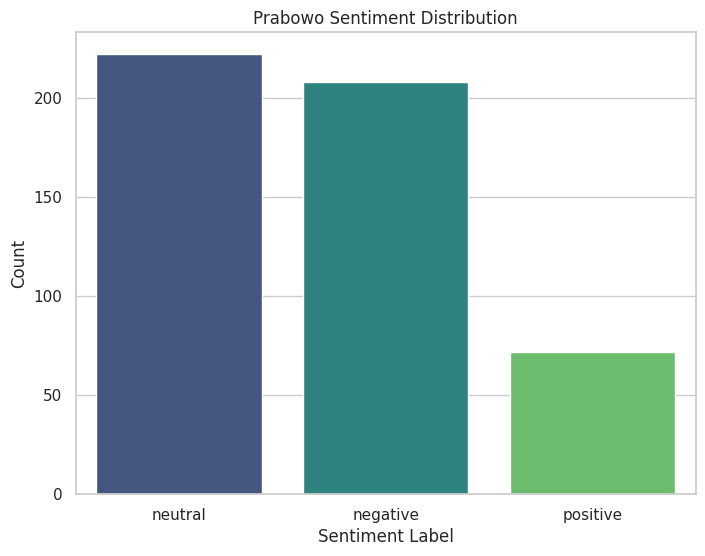

In [ ]:
# Count the occurrences of each sentiment label
sentiment_counts = prabowo['sentiment_label'].value_counts()

# Plot a bar chart using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Prabowo Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

In [ ]:
prabowo_positive = prabowo[prabowo['sentiment_label'] == 'positive']
prabowo_positive.head()

,cleaned_text,sentiment_label,sentiment_score
7,yang visi misi jelas presiden jokowidodo kita ...,positive,0.705887
8,geloraco solid tetap kawal prabowo-gibran hing...,positive,0.903832
13,zy zy its me jokowi prabowo gibran tweet perca...,positive,0.563174
16,partaisocmed pak prabowo mas gibran dapat berk...,positive,0.982447
36,officialinews duo power ranger prabowo-gibran ...,positive,0.803653


In [ ]:
prabowo_neutral = prabowo[prabowo['sentiment_label'] == 'neutral']
prabowo_neutral.head()

,cleaned_text,sentiment_label,sentiment_score
0,geloraco soliditas adalah kunci wujud prabowo-...,neutral,0.534287
2,iam ciaracafia broirawan resty j cayah prabowo...,neutral,0.606355
5,tkn pasti prabu revolusi tak ada struktur tims...,neutral,0.996154
6,yaniarsim muipusat zul hasan prabowo ra cethoo,neutral,0.995679
10,vivacoid pokok baik cuman prabowo gibran,neutral,0.988988


In [ ]:
prabowo_negative = prabowo[prabowo['sentiment_label'] == 'negative']
prabowo_negative.head()

,cleaned_text,sentiment_label,sentiment_score
1,chidory uas anies ingat jangan tasyahud 2 jari...,negative,0.940910
3,pilpres ajang tentu masa depan bangsa gw hibur...,negative,0.671453
4,lagipula mana mungkin terima pimpin langgar ha...,negative,0.991265
9,siti atiqoh amp alam ikut kampanye ganjar tak ...,negative,0.991573
11,dennysiregar7 prabowo hukum sama tdk beda tema...,negative,0.995090


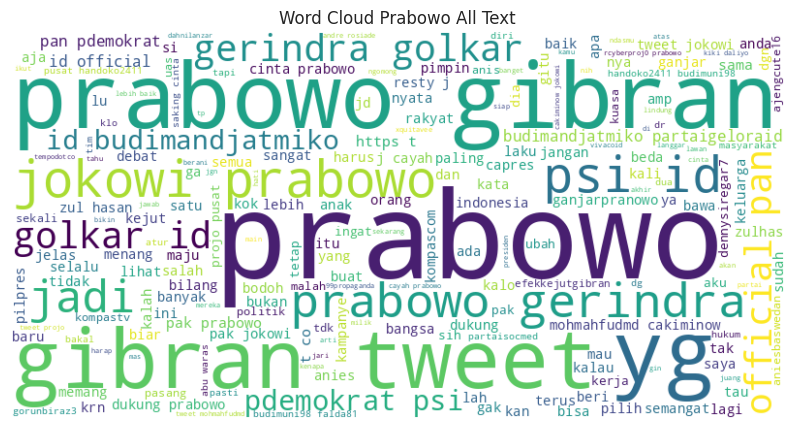

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into a single string
all_text = ' '.join(prabowo['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Prabowo All Text')
plt.show()

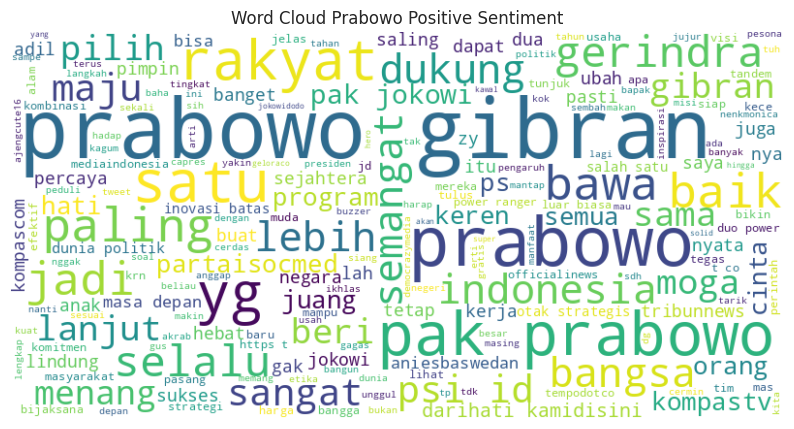

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into a single string
all_text = ' '.join(prabowo_positive['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Prabowo Positive Sentiment')
plt.show()

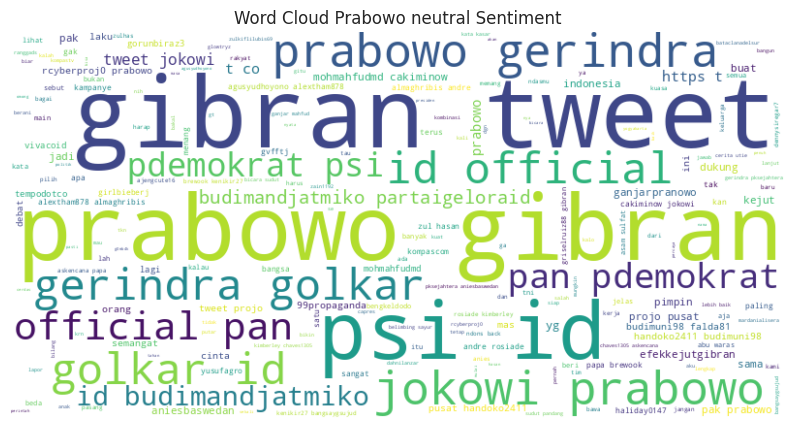

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into a single string
all_text = ' '.join(prabowo_neutral['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Prabowo neutral Sentiment')
plt.show()

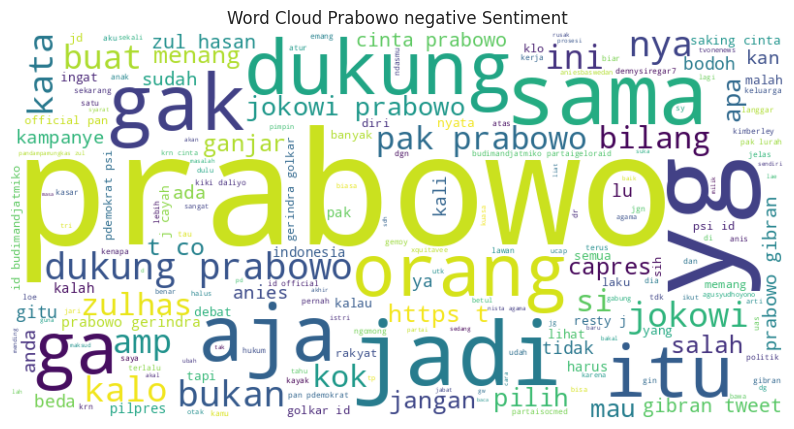

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into a single string
all_text = ' '.join(prabowo_negative['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Prabowo negative Sentiment')
plt.show()

# N - Gram Analysis

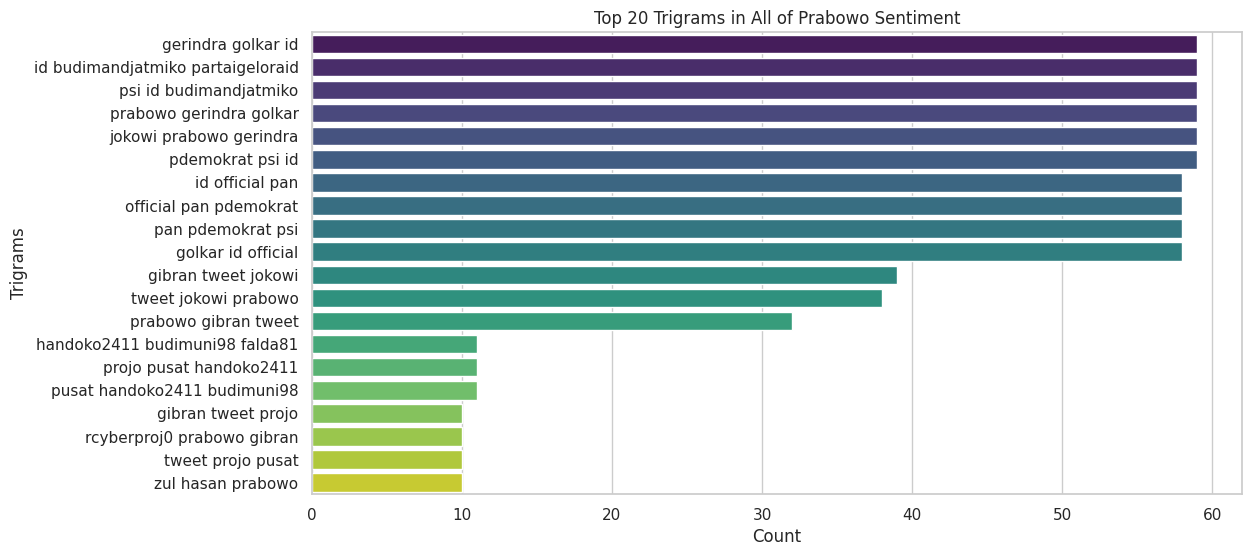

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a CountVectorizer with trigram settings
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words=None, max_features=20)

# Fit and transform the 'cleaned_text' column
trigram_matrix = vectorizer.fit_transform(prabowo['cleaned_text'])

# Get trigram names
trigram_names = vectorizer.get_feature_names_out()

# Convert the trigram matrix to a DataFrame
trigram_df = pd.DataFrame(trigram_matrix.toarray(), columns=trigram_names)

# Sum the occurrences of each trigram
trigram_counts = trigram_df.sum()

# Sort trigrams by count in descending order
trigram_counts = trigram_counts.sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=trigram_counts.head(20).values, y=trigram_counts.head(20).index, palette="viridis")
plt.title('Top 20 Trigrams in All of Prabowo Sentiment')
plt.xlabel('Count')
plt.ylabel('Trigrams')
plt.show()

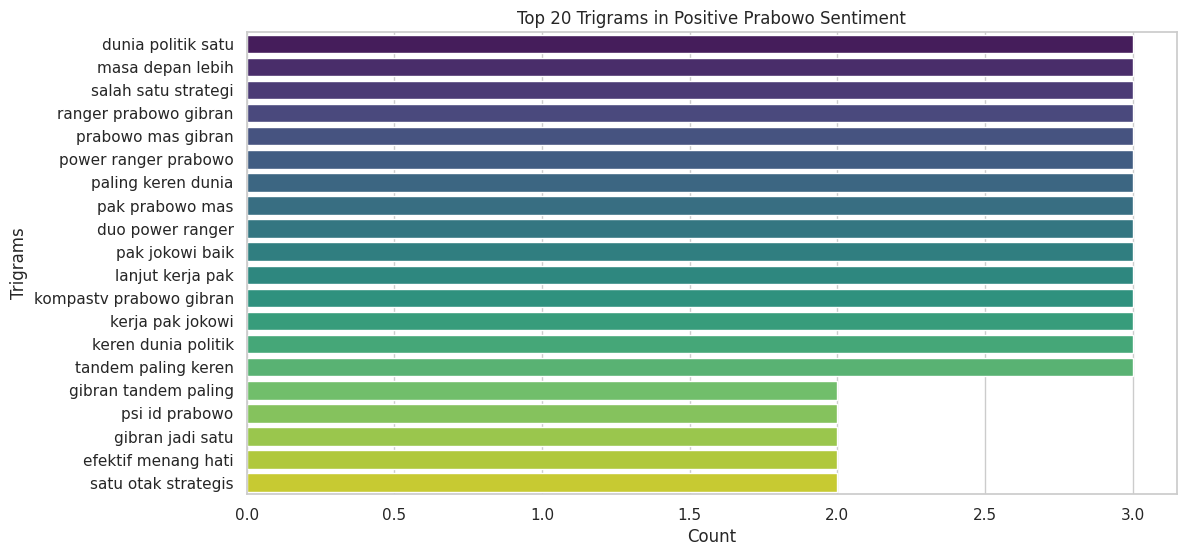

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a CountVectorizer with trigram settings
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words=None, max_features=20)

# Fit and transform the 'cleaned_text' column
trigram_matrix = vectorizer.fit_transform(prabowo_positive['cleaned_text'])

# Get trigram names
trigram_names = vectorizer.get_feature_names_out()

# Convert the trigram matrix to a DataFrame
trigram_df = pd.DataFrame(trigram_matrix.toarray(), columns=trigram_names)

# Sum the occurrences of each trigram
trigram_counts = trigram_df.sum()

# Sort trigrams by count in descending order
trigram_counts = trigram_counts.sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=trigram_counts.head(20).values, y=trigram_counts.head(20).index, palette="viridis")
plt.title('Top 20 Trigrams in Positive Prabowo Sentiment')
plt.xlabel('Count')
plt.ylabel('Trigrams')
plt.show()

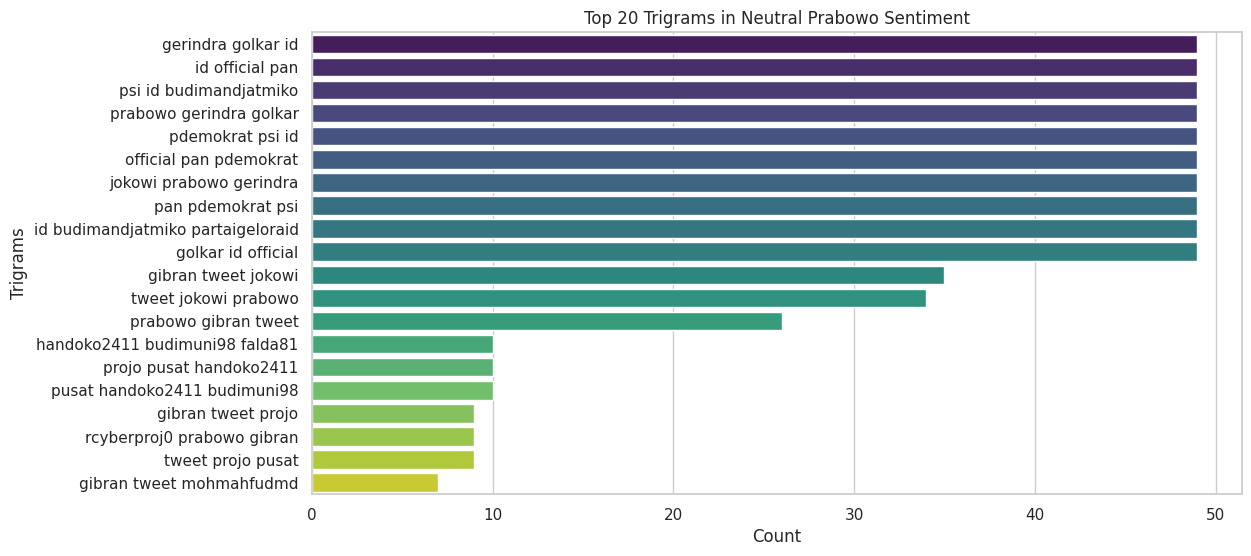

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a CountVectorizer with trigram settings
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words=None, max_features=20)

# Fit and transform the 'cleaned_text' column
trigram_matrix = vectorizer.fit_transform(prabowo_neutral['cleaned_text'])

# Get trigram names
trigram_names = vectorizer.get_feature_names_out()

# Convert the trigram matrix to a DataFrame
trigram_df = pd.DataFrame(trigram_matrix.toarray(), columns=trigram_names)

# Sum the occurrences of each trigram
trigram_counts = trigram_df.sum()

# Sort trigrams by count in descending order
trigram_counts = trigram_counts.sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=trigram_counts.head(20).values, y=trigram_counts.head(20).index, palette="viridis")
plt.title('Top 20 Trigrams in Neutral Prabowo Sentiment')
plt.xlabel('Count')
plt.ylabel('Trigrams')
plt.show()

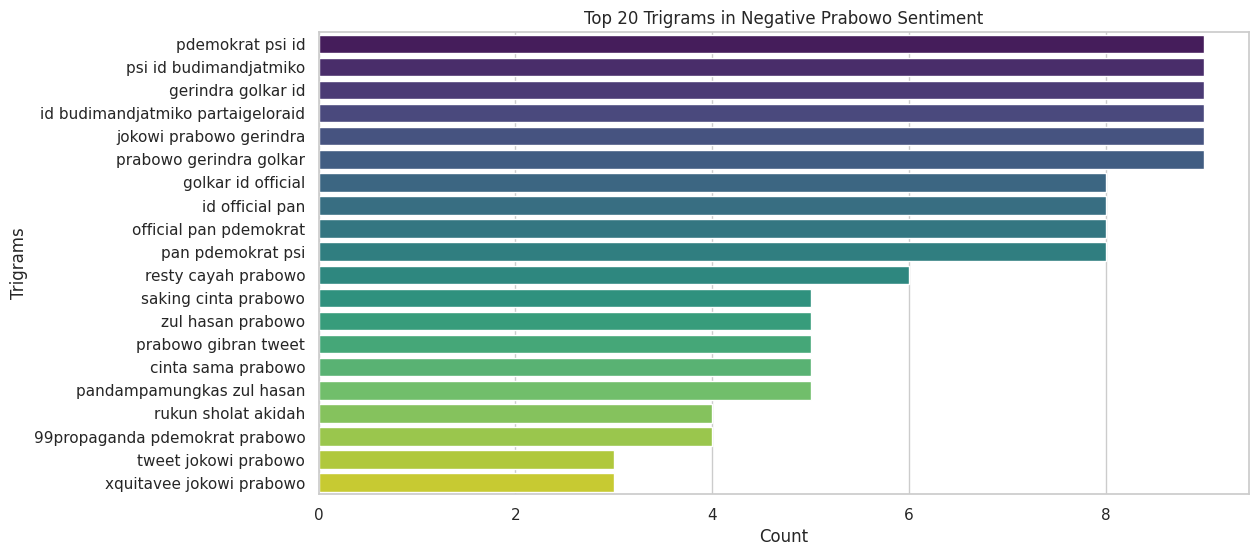

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a CountVectorizer with trigram settings
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words=None, max_features=20)

# Fit and transform the 'cleaned_text' column
trigram_matrix = vectorizer.fit_transform(prabowo_negative['cleaned_text'])

# Get trigram names
trigram_names = vectorizer.get_feature_names_out()

# Convert the trigram matrix to a DataFrame
trigram_df = pd.DataFrame(trigram_matrix.toarray(), columns=trigram_names)

# Sum the occurrences of each trigram
trigram_counts = trigram_df.sum()

# Sort trigrams by count in descending order
trigram_counts = trigram_counts.sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=trigram_counts.head(20).values, y=trigram_counts.head(20).index, palette="viridis")
plt.title('Top 20 Trigrams in Negative Prabowo Sentiment')
plt.xlabel('Count')
plt.ylabel('Trigrams')
plt.show()